In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
import math

# Problem 1

In [18]:
d = {'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'y':[10.0, 16.30, 23.0, 27.5, 31.0, 35.6, 39.0, 41.5, 42.9, 45.0, 46.0, 45.5, 46.0, 49.0, 50.0]}
df = pd.DataFrame(d)

In [19]:
def linear_fit(df,n):

    for i in range(n):
        df.loc[i,'xy'] = df.iloc[i,0]*df.iloc[i,1]
        df.loc[i,'x^2'] = df.iloc[i,0]**2
        
    sum_x , sum_y, sum_xy, sum_xx = 0,0,0,0
    for i in range(n):
        sum_x +=df.iloc[i,0]
        sum_y +=df.iloc[i,1]    
        sum_xy +=df.iloc[i,2]    
        sum_xx +=df.iloc[i,3]    

    mean_x = sum_x/n
    mean_y = sum_y/n
    a1 = (n*sum_xy - sum_x*sum_y)/(n*sum_xx - sum_x**2)
    a0 = mean_y - a1*mean_x
    return a1, a0, mean_y

In [20]:
a1, a0, mean_y = linear_fit(df, 15)

print(a1, a0)

2.610357142857143 15.670476190476183


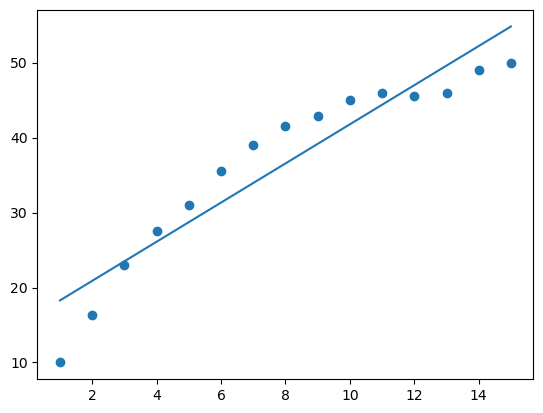

r2: 0.8878057920337632


In [21]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], [a1*x + a0 for x in df['x']])
plt.show()


st, sr= 0,0
for i in range(15):
    st+= (df.loc[i,'y'] - mean_y)**2
    sr+= (df.loc[i,'y'] - a1*df.loc[i,'x'] - a0)**2
    
r2 = 1- sr/st
print('r2:',r2)

# Problem 2

[]

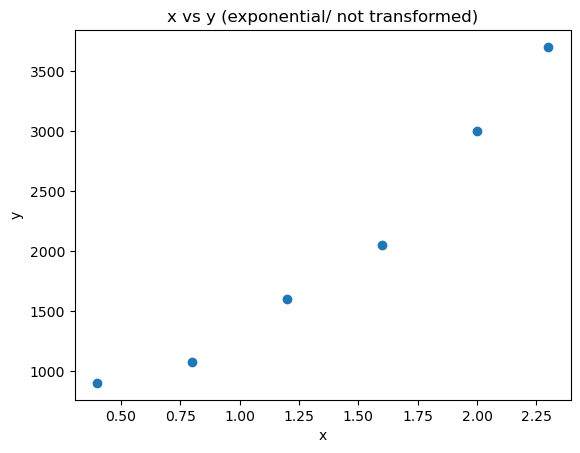

In [22]:
data = {'x':[0.4, 0.8, 1.2, 1.6, 2, 2.3],
    'y':[900, 1075, 1600, 2050, 3000, 3700]}
df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (exponential/ not transformed)')
plt.plot()



,x,lny
0,0.4,6.802395
1,0.8,6.980076
2,1.2,7.377759
3,1.6,7.625595
4,2.0,8.006368
5,2.3,8.216088


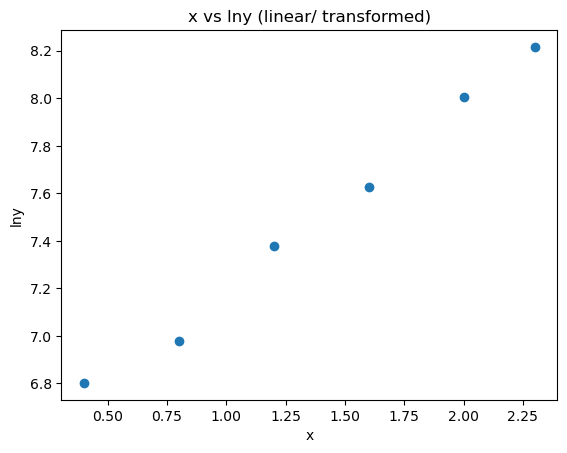

In [23]:
for i in range(6):
    df.loc[i,'lny'] = math.log(df.iloc[i,1])
    
plt.scatter(df['x'], df['lny'])
plt.xlabel('x')
plt.ylabel('lny')
plt.title('x vs lny (linear/ transformed)')
plt.plot()

df1 = df.drop(['y'],axis=1)
df1

In [24]:
a1, a0, mean_y = linear_fit(df1, 6)

print(a1, a0)

0.7696733828706417 6.436665212117106


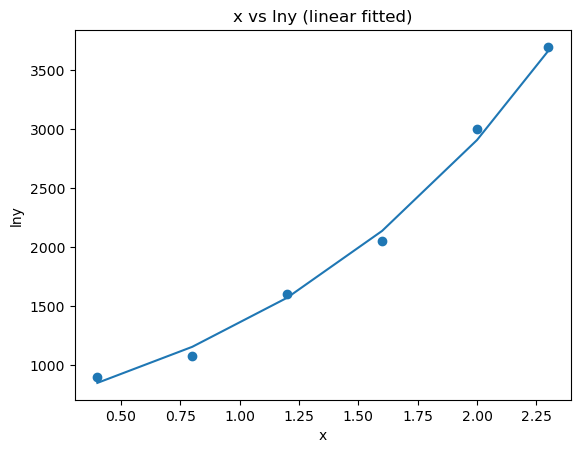

r2: 0.9924844033005004


In [25]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], [math.exp(a1*x + a0) for x in df['x']])
plt.xlabel('x')
plt.ylabel('lny')
plt.title('x vs lny (linear fitted)')
plt.show()


st, sr= 0,0
for i in range(6):
    st+= (df.loc[i,'lny'] - mean_y)**2
    sr+= (df.loc[i,'lny'] - a1*df.loc[i,'x'] - a0)**2
    
r2 = 1- sr/st
print('r2:',r2)

# Problem 3

In [26]:
d = {'x':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'y':[10.0, 16.30, 23.0, 27.5, 31.0, 35.6, 39.0, 41.5, 42.9, 45.0, 46.0, 45.5, 46.0, 49.0, 50.0]}
df = pd.DataFrame(d)

In [27]:
def naive_gauss(a, b, n):

    for k in range(0, n-1):
        for i in range(k+1, n):
            fac = a[i][k]/a[k][k]
            for j in range(k+1, n):
                a[i][j] = a[i][j] - fac*a[k][j]
            b[i] = b[i] - fac*b[k]

    x = [0 for i in range(n)]
    x[n-1] = b[n-1]/a[n-1][n-1]

    for i in range(n-2, -1, -1):
        sum = b[i]
        for j in range(i+1, n):
            sum = sum - a[i][j]*x[j]
        x[i] = sum/a[i][i]

    return x


In [28]:
def quadratic_fit(df, n):

    for i in range(n):
        df.loc[i,'xy'] = df.iloc[i,0]*df.iloc[i,1]
        df.loc[i,'x^2'] = df.iloc[i,0]**2
        df.loc[i,'x^3'] = df.iloc[i,0]**3
        df.loc[i,'x^4'] = df.iloc[i,0]**4
        df.loc[i,'yx^2'] = df.iloc[i,0]**2*df.iloc[i,1]

        
    sum_x , sum_y, sum_xy, sum_xx, sum_x3, sum_x4, sum_yx2 = 0,0,0,0,0,0,0
    for i in range(n):
        sum_x +=df.iloc[i,0]
        sum_y +=df.iloc[i,1]    
        sum_xy +=df.iloc[i,2]    
        sum_xx +=df.iloc[i,3]
        sum_x3 +=df.iloc[i,4]
        sum_x4 +=df.iloc[i,5]
        sum_yx2 +=df.iloc[i,6]

    z = [[n, sum_x, sum_xx], [sum_x, sum_xx, sum_x3], [sum_xx, sum_x3, sum_x4]]
    y = [sum_y, sum_xy, sum_yx2]
    
    a = naive_gauss(z, y, 3)
    return a




In [29]:
a = quadratic_fit(df, 15)
print(a)

[5.188791208791076, 6.30977537168718, -0.23121363930187722]


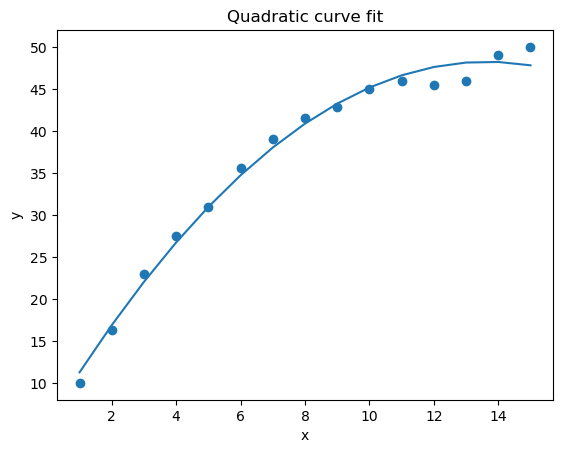

In [30]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], [a[2]*x*x + a[1]*x + a[0] for x in df['x']])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic curve fit')
plt.show()

